<a href="https://colab.research.google.com/github/YonggunJung/ICT_TensorFlow/blob/main/300_DNN_CIFAR_10_Categorical_Classification_Overfitting_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR 10 - Categorical Classification

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# I. CIFAR 10 Data_Set Load & Review

> ## 1) Load CIFAR 10 Data_Set

In [ ]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


* Train_Data Information

In [ ]:
print(len(X_train))
print(X_train.shape)
print()
print(len(y_train))
print(y_train[0:5])

50000
(50000, 32, 32, 3)

50000
[[6]
 [9]
 [9]
 [4]
 [1]]


* Test_Data Information

In [ ]:
print(len(X_test))
print(X_test.shape)
print()
print(len(y_test))
print(y_test[0:5])

10000
(10000, 32, 32, 3)

10000
[[3]
 [8]
 [8]
 [0]
 [6]]


> ## 2) Visualization

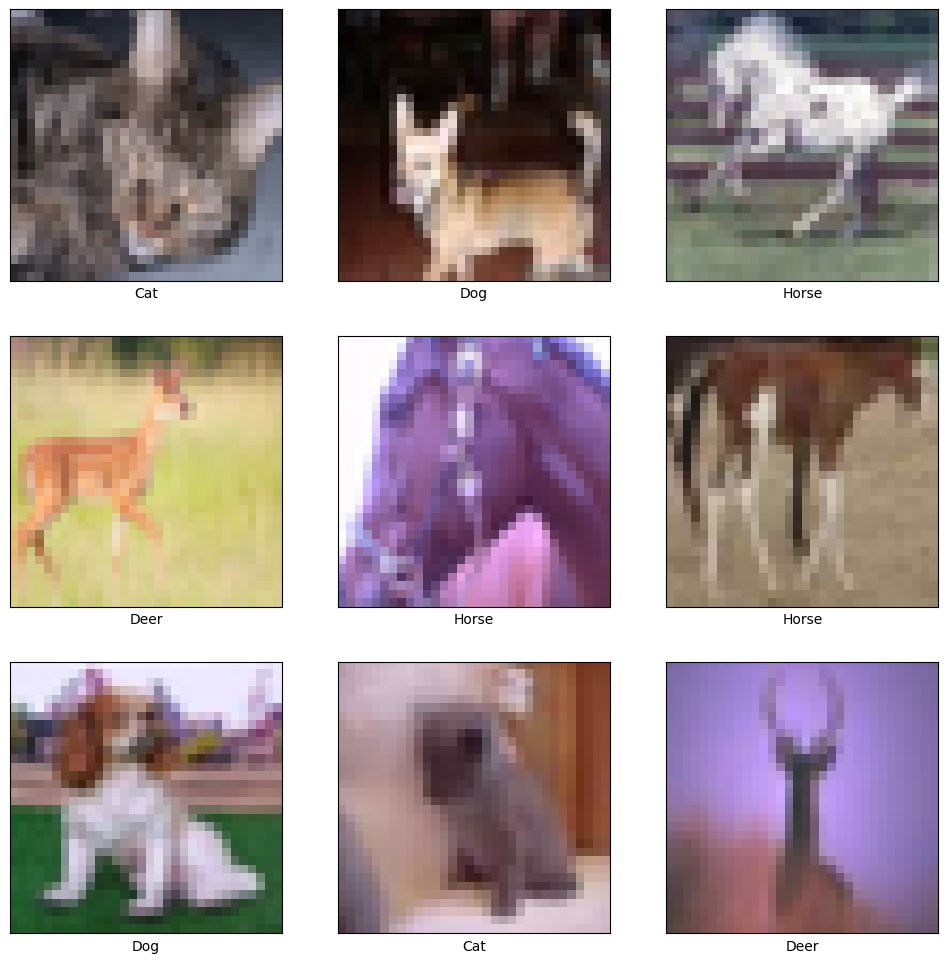

In [ ]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

import matplotlib.pyplot as plt
import numpy as np

Indexes = np.random.randint(50000,
                            size = 9)

plt.figure(figsize = (12, 12))
for i, idx in enumerate(Indexes):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[idx])
    plt.xlabel(class_names[int(y_train[idx])])

plt.show()

* RGB Channels

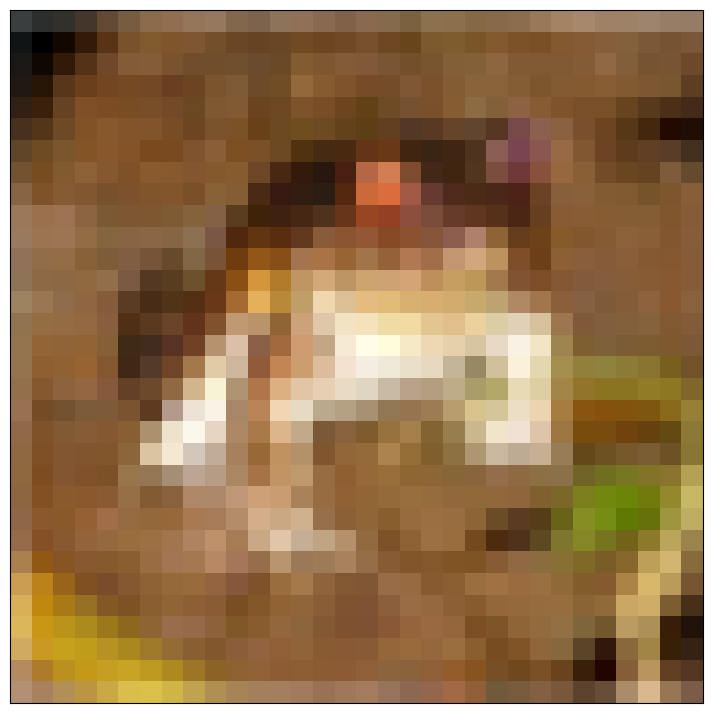

In [ ]:
digit = X_train[0]

plt.figure(figsize = (9, 9))
plt.imshow(digit)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
import numpy as np
import sys
np.set_printoptions(linewidth = 150, threshold = sys.maxsize)

print(y_train[0])
print()
print(X_train[0][0][0])
# print(X_train[0][:, :, 0])

[6]

[59 62 63]


# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape
 * (50000, 32, 32, 3) to (50000, 3072)

In [ ]:
X_train = X_train.reshape((50000, 32 * 32 * 3))
X_test = X_test.reshape((10000, 32 * 32 * 3))

X_train.shape, X_test.shape

((50000, 3072), (10000, 3072))

* Normalization

In [ ]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [ ]:
print(X_train[0])

[0.23137255 0.24313725 0.24705882 0.16862745 0.18039216 0.17647059 0.19607843 0.18823529 0.16862745 0.26666667 0.21176471 0.16470588 0.38431373
 0.28627451 0.20392157 0.46666667 0.35686275 0.24705882 0.54509804 0.41960784 0.29411765 0.56862745 0.43137255 0.31372549 0.58431373 0.45882353
 0.34901961 0.58431373 0.47058824 0.36470588 0.51372549 0.40392157 0.30196078 0.49019608 0.38823529 0.29803922 0.55686275 0.45098039 0.35686275
 0.56470588 0.43921569 0.3372549  0.5372549  0.41176471 0.30980392 0.50588235 0.38039216 0.27843137 0.5372549  0.41568627 0.30980392 0.5254902
 0.41568627 0.29803922 0.48627451 0.38039216 0.25098039 0.54509804 0.44313725 0.30588235 0.54509804 0.43921569 0.29411765 0.52156863 0.41176471
 0.27058824 0.53333333 0.41176471 0.29019608 0.54509804 0.42352941 0.30196078 0.59607843 0.47058824 0.34901961 0.63921569 0.51372549 0.39215686
 0.65882353 0.53333333 0.42352941 0.62352941 0.50588235 0.4        0.61960784 0.50980392 0.40784314 0.61960784 0.51764706 0.42352941 0.59

> ## 2) One Hot Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


> ## 3) train_test_split( )

* Train(40,000) vs. Validation(10,000)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)

# III. Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - 3개 Hidden Layers & 2816개 Nodes

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

CIFAR = models.Sequential()
CIFAR.add(layers.Dense(2048, activation = 'relu', input_shape = (32 * 32 * 3,)))
CIFAR.add(layers.Dense(512, activation = 'relu'))
CIFAR.add(layers.Dense(128, activation = 'relu'))
CIFAR.add(layers.Dense(10, activation = 'softmax'))

* 모델 구조 확인

In [ ]:
CIFAR.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              6293504   
                                                                 
 dense_1 (Dense)             (None, 512)               1049088   
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 7409546 (28.27 MB)
Trainable params: 7409546 (28.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [ ]:
CIFAR.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 5분

In [ ]:
%%time

Hist_CIFAR = CIFAR.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
313/313 [==============================] - 9s 8ms/step - loss: 2.0056 - accuracy: 0.2891 - val_loss: 1.7697 - val_accuracy: 0.3565
Epoch 2/100
313/313 [==============================] - 2s 6ms/step - loss: 1.7276 - accuracy: 0.3794 - val_loss: 1.6833 - val_accuracy: 0.3947
Epoch 3/100
313/313 [==============================] - 2s 7ms/step - loss: 1.6405 - accuracy: 0.4117 - val_loss: 1.6078 - val_accuracy: 0.4329
Epoch 4/100
313/313 [==============================] - 2s 6ms/step - loss: 1.5816 - accuracy: 0.4364 - val_loss: 1.6116 - val_accuracy: 0.4270
Epoch 5/100
313/313 [==============================] - 2s 5ms/step - loss: 1.5325 - accuracy: 0.4521 - val_loss: 1.5204 - val_accuracy: 0.4653
Epoch 6/100
313/313 [==============================] - 2s 6ms/step - loss: 1.4873 - accuracy: 0.4694 - val_loss: 1.5059 - val_accuracy: 0.4670
Epoch 7/100
313/313 [==============================] - 2s 6ms/step - loss: 1.4509 - accuracy: 0.4807 - val_loss: 1.4755 - val_accuracy: 0.4742

> ## 4) 학습 결과 시각화

* Loss Visualization

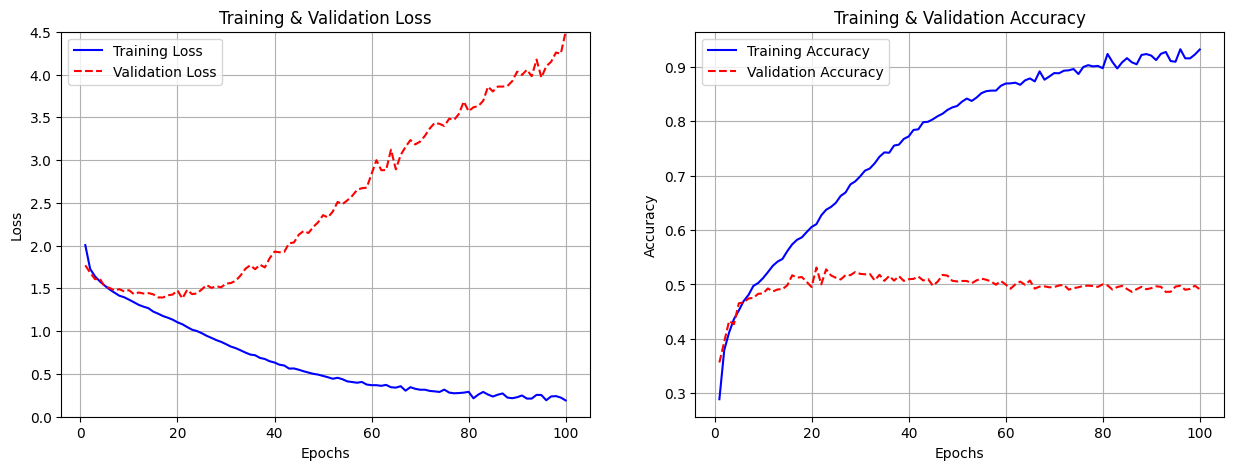

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_CIFAR.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_CIFAR.history['loss'], 'b-')
plt.plot(epochs, Hist_CIFAR.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 4.5)
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_CIFAR.history['accuracy'], 'b-')
plt.plot(epochs, Hist_CIFAR.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [ ]:
loss, accuracy = CIFAR.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 4.50751
Accuracy = 0.49080


> ## 6) Model Predict

* Probability

In [ ]:
np.set_printoptions(suppress = True, precision = 9)

print(CIFAR.predict(X_test[:1,:], verbose = 0))

[[0.00000001  0.000000049 0.011428363 0.98830366  0.0001864   0.000063835 0.          0.000011762 0.          0.000005893]]


* Class

In [ ]:
print(np.argmax(CIFAR.predict(X_test[:1,:], verbose = 0)))

3


> ## 7) Image Visualization

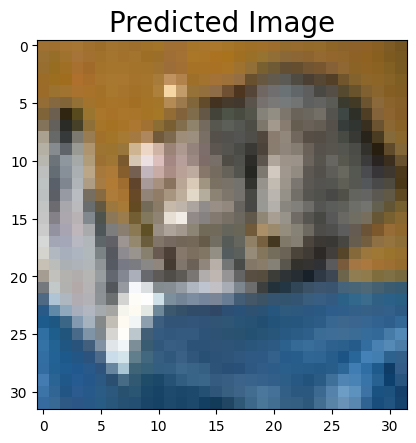

In [ ]:
plt.imshow(X_test[0].reshape(32, 32, 3), cmap = 'gray')
plt.title('Predicted Image', fontsize = 20)
plt.show()

#
#
#
# End Of Document
#
#
#